In [25]:
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import seaborn as sns

In [44]:
df = pd.read_csv('../data/Risky_Prescribing_Measures_Quarter_3_2016_-_Current_Quarterly_County___Statewide_Health.csv')

In [45]:
df.head()

,County,Rate or Count,Risky Measure Type,Age Group,Gender,Class,Time Measure,Year,Time Period,Quarter Date Start,Notes,County Code Number,County Code Text,State FIPS Code,County FIPS Code,Latitude,Longitude,Georeferenced Latitude & Longitude
0,Pennsylvania,205.0,Number of Individuals Seeing 5+ Prescribers an...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2017,2017 Q1,01/01/2017,NaN,0,0,42,0,39.346129,-75.167756,POINT (-75.167756 39.346129)
1,Lackawanna,342.0,Number of Individuals with Average Daily MME >...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2020,2020 Q3,07/01/2020,NaN,35,35,42,69,41.439101,-75.612183,POINT (-75.61218345 41.43910064)
2,Pennsylvania,45.3,Rate of Individuals with Average Daily MME > 9...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2017,2017 Q4,10/01/2017,NaN,0,0,42,0,39.346129,-75.167756,POINT (-75.167756 39.346129)
3,Pennsylvania,54034.0,Number of Individuals with Average Daily MME > 90,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2018,2018 Q1,01/01/2018,NaN,0,0,42,0,39.346129,-75.167756,POINT (-75.167756 39.346129)
4,Mifflin,0.0,Number of Individuals Seeing 5+ Prescribers an...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2021,2021 Q1,01/01/2021,NaN,44,44,42,87,40.612749,-77.620031,POINT (-77.62003089 40.61274928)


In [46]:
### Removing PA as to not count twice
df = df[df['County'] != 'Pennsylvania']

In [47]:
df.sort_values(by=['County'], inplace=True)

In [48]:
df['Total Risky Prescibing per County/Year'] = df.groupby(['County','Year'])['Rate or Count'].transform('sum')



In [49]:
df.head(50)

,County,Rate or Count,Risky Measure Type,Age Group,Gender,Class,Time Measure,Year,Time Period,Quarter Date Start,Notes,County Code Number,County Code Text,State FIPS Code,County FIPS Code,Latitude,Longitude,Georeferenced Latitude & Longitude,Total Risky Prescibing per County/Year
14292,Adams,38.120000,Rate of Individuals with Average Daily MME > 9...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2018,2018 Q4,10/01/2018,NaN,1,1,42,1,39.872096,-77.222243,POINT (-77.22224271 39.87209565),15368.200000
18805,Adams,792.000000,Number of Individuals with Overlapping Opioid/...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2020,2020 Q4,10/01/2020,NaN,1,1,42,1,39.872096,-77.222243,POINT (-77.22224271 39.87209565),10367.339405
309,Adams,269.000000,Number of Individuals with Average Daily MME >...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2018,2018 Q3,07/01/2018,NaN,1,1,42,1,39.872096,-77.222243,POINT (-77.22224271 39.87209565),15368.200000
703,Adams,34.100000,Rate of Individuals with Average Daily MME > 1...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2017,2017 Q3,07/01/2017,NaN,1,1,42,1,39.872096,-77.222243,POINT (-77.22224271 39.87209565),19674.270000
8470,Adams,NaN,Number of Individuals Seeing 5+ Prescribers an...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2019,2019 Q2,04/01/2019,Not displayed when count is between 1 and 5.,1,1,42,1,39.872096,-77.222243,POINT (-77.22224271 39.87209565),12119.290000
14839,Adams,106.110000,Rate of Individuals with Overlapping Opioid/Be...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2018,2018 Q3,07/01/2018,NaN,1,1,42,1,39.872096,-77.222243,POINT (-77.22224271 39.87209565),15368.200000
18851,Adams,73.779961,Rate of Individuals with Average Daily MME > 5...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2020,2020 Q3,07/01/2020,NaN,1,1,42,1,39.872096,-77.222243,POINT (-77.22224271 39.87209565),10367.339405
14793,Adams,9.000000,Number of Individuals Seeing 3+ Prescribers an...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2020,2020 Q2,04/01/2020,NaN,1,1,42,1,39.872096,-77.222243,POINT (-77.22224271 39.87209565),10367.339405
22188,Adams,76.880000,Rate of Individuals with Overlapping Opioid/Be...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2020,2020 Q4,10/01/2020,NaN,1,1,42,1,39.872096,-77.222243,POINT (-77.22224271 39.87209565),10367.339405
4191,Adams,NaN,Number of Individuals Seeing 4+ Prescribers an...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2019,2019 Q2,04/01/2019,Not displayed when count is between 1 and 5.,1,1,42,1,39.872096,-77.222243,POINT (-77.22224271 39.87209565),12119.290000


In [50]:
### there is no breakdown between Age group and genders, so 
##We can only analyze by county. Tableau is the best option,
##We should combine with the overdose dataset

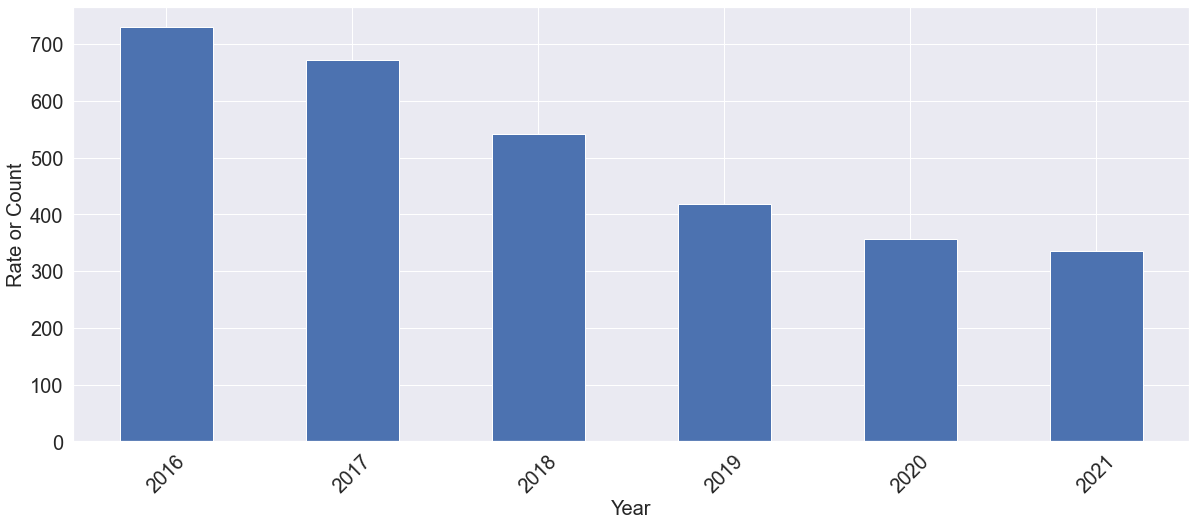

In [51]:
### By year

plt.rcParams["figure.figsize"] = (20,8)
sns.set(font_scale = 2)
df.groupby('Year')['Rate or Count'].mean().plot.bar(fontsize=16)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(xlabel = 'Year', fontsize=20)
plt.ylabel(ylabel = 'Rate or Count', fontsize=20)
plt.show()

In [52]:
### Trending down

In [53]:
df.to_csv('risky_prescribing_cleaned.csv')

In [54]:
df.head()

,County,Rate or Count,Risky Measure Type,Age Group,Gender,Class,Time Measure,Year,Time Period,Quarter Date Start,Notes,County Code Number,County Code Text,State FIPS Code,County FIPS Code,Latitude,Longitude,Georeferenced Latitude & Longitude,Total Risky Prescibing per County/Year
14292,Adams,38.12,Rate of Individuals with Average Daily MME > 9...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2018,2018 Q4,10/01/2018,NaN,1,1,42,1,39.872096,-77.222243,POINT (-77.22224271 39.87209565),15368.200000
18805,Adams,792.00,Number of Individuals with Overlapping Opioid/...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2020,2020 Q4,10/01/2020,NaN,1,1,42,1,39.872096,-77.222243,POINT (-77.22224271 39.87209565),10367.339405
309,Adams,269.00,Number of Individuals with Average Daily MME >...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2018,2018 Q3,07/01/2018,NaN,1,1,42,1,39.872096,-77.222243,POINT (-77.22224271 39.87209565),15368.200000
703,Adams,34.10,Rate of Individuals with Average Daily MME > 1...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2017,2017 Q3,07/01/2017,NaN,1,1,42,1,39.872096,-77.222243,POINT (-77.22224271 39.87209565),19674.270000
8470,Adams,NaN,Number of Individuals Seeing 5+ Prescribers an...,All Ages,All Genders,Risky Prescribing Measures,Quarterly Counts,2019,2019 Q2,04/01/2019,Not displayed when count is between 1 and 5.,1,1,42,1,39.872096,-77.222243,POINT (-77.22224271 39.87209565),12119.290000


In [56]:
df1 = df[['County','Year','Total Risky Prescibing per County/Year']]